In [7]:
import pymatgen as pg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import RMSAD_tool
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
df = pd.read_csv("training.csv")

#make elemental/B2 features
dip = []
VEC = []
VECsd = []
bondSD = []
for chemform in df["Chemform"]:
    comp = pg.Composition(chemform)
    elements = {}
    for element in comp:
        elements[str(element)] = comp.get_atomic_fraction(element)
    pairs = {}
    for element1 in elements:
        for element2 in elements:
            pair = element1 + element2
            concentration = elements[element1] * elements[element2]
            pairs[pair] = concentration
    
    dip.append(RMSAD_tool.get_feature("d band bimodality",pairs))
    VEC.append(RMSAD_tool.get_VEC(elements)-5.7)
    VECsd.append(RMSAD_tool.get_VEC_SD(elements))
    bondSD.append(RMSAD_tool.get_feature_SD("half bond",pairs))

#feature engineering
df["d-band bimodality"] = dip
df["d-band bimodality^2"] = df["d-band bimodality"]**2
df["VEC-5.7"] = VEC
df["VEC5.7^2"] = df["VEC-5.7"]**2
df["VEC SD from 5.7"] = VECsd
df["VECSD5.7^2"] = df["VEC SD from 5.7"]**2
df["Bond SD"] = bondSD
df["Dbimodality^2xVEC5.7^2"] = df["VEC5.7^2"]*df["d-band bimodality^2"]
df["Dbimodality^2xVECSD5.7^2"] = df["VECSD5.7^2"]*df["d-band bimodality^2"]

df

,Unnamed: 0,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2
0,0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698
1,1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383
2,2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014
3,3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643
4,4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459
210,210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294
211,211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911
212,212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861


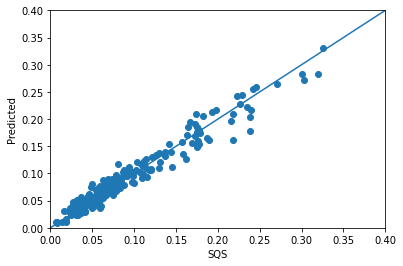

In [16]:
x = df[["Bond SD","Dbimodality^2xVEC5.7^2","Dbimodality^2xVECSD5.7^2"]]
y = df["RMSAD (SQS)"]

#fit linear regression
linreg = LinearRegression(fit_intercept=False)
linreg.fit(x,y)
y_hat = linreg.predict(x)
df["RMSAD (Predict)"] = y_hat

#plot results
plt.scatter(y,y_hat)
plt.plot([0,0.4],[0,0.4])
plt.xlim(0,0.4)
plt.ylim(0,0.4)
plt.xlabel("SQS")
plt.ylabel("Predicted")

plt.show()

In [17]:
df

,Unnamed: 0,Chemform,N,RMSAD (SQS),d-band bimodality,d-band bimodality^2,VEC-5.7,VEC5.7^2,VEC SD from 5.7,VECSD5.7^2,Bond SD,Dbimodality^2xVEC5.7^2,Dbimodality^2xVECSD5.7^2,RMSAD (Predict)
0,0,NbTaMoWRu,5,0.063815,0.053543,0.002867,0.30,0.0900,1.135782,1.290000,0.028272,0.000258,0.003698,0.076320
1,1,TiZrHfVNb,5,0.319351,0.061850,0.003825,-1.30,1.6900,1.389244,1.930000,0.064811,0.006465,0.007383,0.283597
2,2,WNbTaMoV,5,0.066301,0.055429,0.003072,-0.30,0.0900,0.574456,0.330000,0.035764,0.000277,0.001014,0.061012
3,3,VTaMoWRe,5,0.045433,0.053694,0.002883,0.10,0.0100,0.754983,0.570000,0.032887,0.000029,0.001643,0.058237
4,4,HfMo3V2Ta2Nb2,5,0.098663,0.056545,0.003197,-0.50,0.2500,0.781025,0.610000,0.047074,0.000799,0.001950,0.094925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,209,WVMo2,3,0.049079,0.049132,0.002414,0.05,0.0025,0.435890,0.190000,0.025383,0.000006,0.000459,0.036991
210,210,ZrHf3V2Mo2W2,5,0.176459,0.057693,0.003328,-0.70,0.4900,1.135782,1.290000,0.067614,0.001631,0.004294,0.160184
211,211,ZrNb,2,0.164482,0.053905,0.002906,-1.20,1.4400,1.300000,1.690000,0.042012,0.004184,0.004911,0.184875
212,212,ZrWNb,3,0.125631,0.057772,0.003338,-0.70,0.4900,1.075484,1.156667,0.050001,0.001635,0.003861,0.133608
